# Assessing Data Quality

Import librerie

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Lettura del dataset

In [2]:
df = pd.read_csv("dataset/customer_supermarket.csv", sep="\t",index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 8 columns):
BasketID           471910 non-null object
BasketDate         471910 non-null object
Sale               471910 non-null object
CustomerID         406830 non-null float64
CustomerCountry    471910 non-null object
ProdID             471910 non-null object
ProdDescr          471157 non-null object
Qta                471910 non-null int64
dtypes: float64(1), int64(1), object(6)
memory usage: 32.4+ MB


In [3]:
df.head()

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,01/12/10 08:26,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,01/12/10 08:26,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


## Missing values

Verififichiamo la presenza di missing values all'interno del dataset. In questa fase rileviamo i problemi, in seguito modificheremo e sostituiremo gli attributi mancanti

In [4]:
df.isnull().any()

BasketID           False
BasketDate         False
Sale               False
CustomerID          True
CustomerCountry    False
ProdID             False
ProdDescr           True
Qta                False
dtype: bool

Possiamo osservare che ci sono missing values per gli attributi CustomerID e ProdDesc. Verifichiamo quanti sample sono affetti da questa mancanza

### CostumerID

In [5]:
df[df['CustomerID'].isnull()]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
1444,536544,01/12/10 14:32,"2,51",NaN,United Kingdom,21774,DECORATIVE CATS BATHROOM BOTTLE,2
1446,536544,01/12/10 14:32,"1,66",NaN,United Kingdom,21787,RAIN PONCHO RETROSPOT,2
1447,536544,01/12/10 14:32,"1,66",NaN,United Kingdom,21790,VINTAGE SNAP CARDS,9
1448,536544,01/12/10 14:32,"2,51",NaN,United Kingdom,21791,VINTAGE HEADS AND TAILS CARD GAME,2
1450,536544,01/12/10 14:32,"0,43",NaN,United Kingdom,21802,CHRISTMAS TREE HEART DECORATION,9
...,...,...,...,...,...,...,...,...
541532,581498,09/12/11 10:26,"4,13",NaN,United Kingdom,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,1
541534,581498,09/12/11 10:26,"3,29",NaN,United Kingdom,85049a,TRADITIONAL CHRISTMAS RIBBONS,5
541538,581498,09/12/11 10:26,"4,96",NaN,United Kingdom,85150,LADIES & GENTLEMEN METAL SIGN,1
541539,581498,09/12/11 10:26,"10,79",NaN,United Kingdom,85174,S/4 CACTI CANDLES,1


In [6]:
len(df[df['CustomerID'].isnull()])

65080

Il numero totale di missin customerId è 65080, però questa mancanza è replicata varie volte. Per diversi sample con lo stesso basketid manca anche il customerID, quindi ci si riferisce sempre alla stessa persona. Vediamo quante sono i BaskedID singoli

In [7]:
len(df[df['CustomerID'].isnull()].BasketID.unique())

2437

In [8]:
len(df.BasketID.unique())

24627

I singoli basketId sono 2437 sul totale di 24627

La mancanza del costumerID è importante, perchè non ci permette di identificare lo stesso cliente. Per recuperalo potremo controllare se nei sample con gli stessi BasketID di quelli mancanti ci sono i dati, creare degli ID nuovi se non si riescono a recuperare oppure eliminare i sample


Vediamo se in alcuni casi il CustomerID è recuperabile

In [9]:

count=0
for elem in df[df['CustomerID'].isnull()].BasketID.unique():
    #Prendiamo dal dataset tutti gli elementi con lo stesso BasketID
    df_loc_equal_basketID=df[df['BasketID']==elem]
    #Controlliamo se qualcuno di questi elementi abbia il CustomerID
    if len(df_loc_equal_basketID[df_loc_equal_basketID['CustomerID'].notnull()])>0:
        print("BasketId:"+elem+"_____Numero di elementi:"+str(len(df_loc_equal_basketID)))
        print("Numero di elementi non null: "+len(df_loc_equal_basketID[df_loc_equal_basketID['CustomerID'].notnull()]))
        count+=1
print("Totale elementi: "+str(count))

Totale elementi: 0


Di conseguenza non è possibile recuperare nessun CostumerId pertanto si dovranno creare degli ID aggregando anche i BasketID oppure eliminare i sample

### ProdDesc

In [10]:
df[df['ProdDescr'].isnull()]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
1986,536546,01/12/10 14:33,0,NaN,United Kingdom,22145,NaN,1
2024,536550,01/12/10 14:34,0,NaN,United Kingdom,85044,NaN,1
2025,536553,01/12/10 14:35,0,NaN,United Kingdom,37461,NaN,3
4347,536764,02/12/10 14:42,0,NaN,United Kingdom,84952C,NaN,-38
4348,536765,02/12/10 14:43,0,NaN,United Kingdom,84952C,NaN,19
...,...,...,...,...,...,...,...,...
522162,580381,02/12/11 17:58,0,NaN,United Kingdom,21758,NaN,-9
535322,581199,07/12/11 18:26,0,NaN,United Kingdom,84581,NaN,-2
535326,581203,07/12/11 18:31,0,NaN,United Kingdom,23406,NaN,15
535332,581209,07/12/11 18:35,0,NaN,United Kingdom,21620,NaN,6


In [11]:
len(df[df['ProdDescr'].isnull()])

753

La mancanza di valori per la descrizione del prodotto non ci interessa più di tanto, l'identificativo del prodotto è più rilevante, sono due attributi doppi. Per recuperalo potremo controllare se nei sample con gli stessi Productid di quelli mancanti ci sono i dati

Cerchiamo di recuperare la descrizione dei prodotti.

In [14]:
retrievable_count=0
error_count=0
for elem in df[df['ProdDescr'].isnull()].ProdID.unique():
    df_loc_equal_ProdID=df[df['ProdID']==elem]
    
    if len(df_loc_equal_ProdID[df_loc_equal_ProdID['ProdDescr'].notnull()])>0:
        # Recupero descrizione a partire dal primo prodotto della lista
        retrived_ProdDescr=df_loc_equal_ProdID[df_loc_equal_ProdID['ProdDescr'].notnull()].iloc[0].ProdDescr

        #Vediamo se le descrizioni sono tutte uguali saranno nan oppure una descrizione del prodotto
        if(len(df_loc_equal_ProdID['ProdDescr'].unique())>2):
            error_count+=1

        #DEBUG
        #print("ProdId: "+elem+" ProdDescr: "+retrived_ProdDescr)
        
        retrievable_count+=1
print("Totale elementi sostituibili: "+str(retrievable_count))
print("Errori trovati: "+str(error_count))

Totale elementi sostituibili: 541
Errori trovati: 76


Del dataframe creato si possono sostituire 541 elementi su 753 ma di questi 76 non sono coerenti tra di loro (stesso ProdID ma diversa ProdDescr). In ogni caso la descrizione nel prodotto è inutile quindi possiamo evitare di processarla e droppare la colonna nella data transformation

## Outliers

In questa sezione ci occupiamo del rilevamento degli outliers

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 8 columns):
BasketID           471910 non-null object
BasketDate         471910 non-null object
Sale               471910 non-null object
CustomerID         406830 non-null float64
CustomerCountry    471910 non-null object
ProdID             471910 non-null object
ProdDescr          471157 non-null object
Qta                471910 non-null int64
dtypes: float64(1), int64(1), object(6)
memory usage: 52.4+ MB


### BasketID
Il basketID è un nominale vediamo da che caratteri è composto (numeri lettere ecc)

In [42]:
print("MAIUSC: "+str(df.BasketID.str.contains('[A-Z]').any()))
print("minuscole: "+str(df.BasketID.str.contains('[a-z]').any()))
print("Numeri: "+str(df.BasketID.str.contains('[0-9]').any()))
print("Segni speciali: "+str(df.BasketID.str.contains('[^A-Za-z0-9]').any()))

MAIUSC: True
minuscole: False
Numeri: True
Segni speciali: False


### BasketDate
Per questo attributo verifichiamo a che intervallo di date include. Per fare ciò cambiamo il tipo della colonna

In [43]:
df_for_dates=df.copy()
df_for_dates["BasketDate"] = pd.to_datetime(df_for_dates['BasketDate'], format='%d/%m/%y %H:%M')
df_for_dates.head()

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-12-01 08:26:00,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-12-01 08:26:00,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


Vediamo che anni sono inclusi

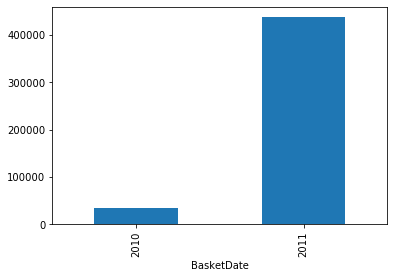

In [44]:
df_for_dates["BasketDate"].groupby(df_for_dates["BasketDate"].dt.year).count().plot(kind="bar")

Verifichiamo la distribuzione dei dati per gli acquisti del 2011

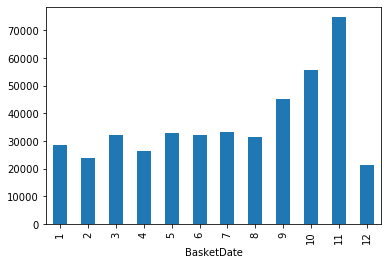

In [45]:
df_for_dates[df_for_dates['BasketDate'] > '2011-01-01']["BasketDate"].groupby(df_for_dates["BasketDate"].dt.month).count().plot(kind="bar")

Verifichiamo la distribuzione dei dati per gli acquisti del 2010

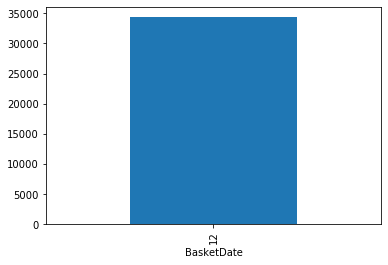

In [46]:

mask=(df_for_dates['BasketDate'] > '2010-01-01') & (df_for_dates['BasketDate'] < '2011-01-01')
df_for_dates[mask]["BasketDate"].groupby(df_for_dates["BasketDate"].dt.month).count().plot(kind="bar")

### Sale
è un object ma dovrebbe essere float, verificare che non ci siano errori

In [47]:
print("Min: "+df.Sale.min())
print("Max: "+df.Sale.max())

Min: -11062,06
Max: 99,96


In [48]:
j_df['Sale'].hist(bins=50)

NameError: name 'j_df' is not defined

### CustomerID
Abbiamo già visto che alcuni valori sono null, vediamo se ci sono errori guardando da che caratteri è composto

### CustomerCountry
è categorico, vediamo se ci sono valori particolari

### ProID 
è nominale, verifichiamo da che caratteri è composto

### ProdDescr
Abbiamo giuà visto che alcuni valori sono null, verificare se ci sono altri errori. è un attributo poco significativo come abbiamo detto

Da qua si vede che in quantitò ci sono degli elementi nulli e non può essere. Mentre il customer id è ok

### Quantità
Verifichiamo l'intervallo e se ci sono errori


In [49]:
df.describe()

,CustomerID,Qta
count,406830.000000,471910.000000
mean,15287.684160,10.716533
std,1713.603074,231.355136
min,12346.000000,-80995.000000
25%,13953.000000,1.000000
50%,15152.000000,4.000000
75%,16791.000000,12.000000
max,18287.000000,80995.000000


In [50]:

print("Distinct Values in BasketDate:\t", df.BasketDate.unique(), "Len: \n", len(df.BasketDate.unique()))
print("Distinct Values in CustomerCountry:\t", df.CustomerCountry.unique(), "Len: \n", len(df.CustomerCountry.unique()))
print("Distinct Values in ProdID:\t", df.ProdID.unique(), "Len: \n", len(df.ProdID.unique()))

print("Distinct Values in Sale:\t", df.Sale.unique(), "Len: \n", len(df.Sale.unique()))
print("Distinct Values in ProdDescr:\t", df.ProdDescr.unique(), "Len: \n", len(df.ProdDescr.unique()))


Distinct Values in BasketDate:	 ['01/12/10 08:26' '01/12/10 08:28' '01/12/10 08:34' ... '09/12/11 12:31'
 '09/12/11 12:49' '09/12/11 12:50'] Len: 
 22428
Distinct Values in CustomerCountry:	 ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA'] Len: 
 38
Distinct Values in ProdID:	 ['85123A' '71053' '84406B' ... '90214U' '23645' '23843'] Len: 
 3953
Distinct Values in Sale:	 ['2,55' '3,39' '2,75' ... '933,17' '1714,17' '224,69'] Len: 
 1146
Distinct Values in ProdDescr:	 ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ...
 'SET 10 CHRISTMAS CARDS HOHOHO 16956'
 'CREAM H